In [1]:
import mxnet as mx
mnist = mx.test_utils.get_mnist()

In [2]:
batch_size = 100
train_iter = mx.io.NDArrayIter(mnist['train_data'], mnist['train_label'], batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(mnist['test_data'], mnist['test_label'], batch_size)

In [3]:
data = mx.sym.var('data')

In [4]:
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=20)
tanh1 = mx.sym.Activation(data=conv1, act_type='tanh')
pool1 = mx.sym.Pooling(data=tanh1, pool_type='max', kernel=(2,2), stride=(2,2))

In [5]:
conv2 = mx.sym.Convolution(data=pool1, kernel=(5,5), num_filter=50)
tanh2 = mx.sym.Activation(data=conv2, act_type='tanh')
pool2 = mx.sym.Pooling(data=tanh2, pool_type='max', kernel=(2,2), stride=(2,2))

In [6]:
flatten = mx.sym.flatten(data=pool2)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
tanh3 = mx.sym.Activation(data=fc1, act_type='tanh')

In [7]:
fc2 = mx.sym.FullyConnected(data=tanh3, num_hidden=10)

In [8]:
lenet = mx.sym.SoftmaxOutput(data=fc2, name='softmax')

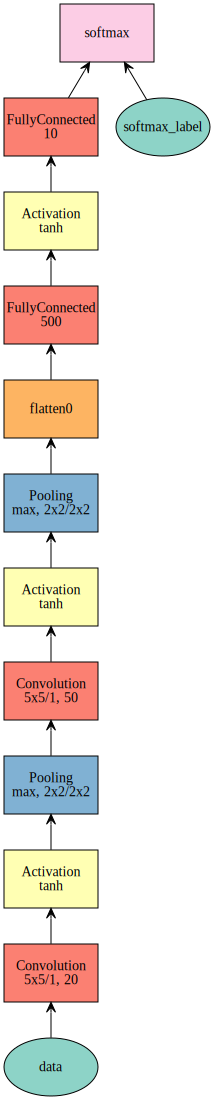

In [9]:
mx.viz.plot_network(symbol=lenet)

In [10]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [11]:
lenet_model = mx.mod.Module(symbol=lenet, context=mx.cpu())

lenet_model.fit(train_iter, eval_data=val_iter, optimizer='sgd',
                optimizer_params={'learning_rate':0.1}, eval_metric='acc',
                batch_end_callback=mx.callback.Speedometer(batch_size, 100),
                num_epoch=10)

INFO:root:Epoch[0] Batch [100]	Speed: 1612.79 samples/sec	accuracy=0.106139
INFO:root:Epoch[0] Batch [200]	Speed: 1617.07 samples/sec	accuracy=0.106400
INFO:root:Epoch[0] Batch [300]	Speed: 1572.07 samples/sec	accuracy=0.113400
INFO:root:Epoch[0] Batch [400]	Speed: 1580.34 samples/sec	accuracy=0.111900
INFO:root:Epoch[0] Batch [500]	Speed: 1589.13 samples/sec	accuracy=0.112500
INFO:root:Epoch[0] Train-accuracy=0.117576
INFO:root:Epoch[0] Time cost=37.499
INFO:root:Epoch[0] Validation-accuracy=0.113500
INFO:root:Epoch[1] Batch [100]	Speed: 1622.90 samples/sec	accuracy=0.148317
INFO:root:Epoch[1] Batch [200]	Speed: 1615.92 samples/sec	accuracy=0.571400
INFO:root:Epoch[1] Batch [300]	Speed: 1539.00 samples/sec	accuracy=0.857200
INFO:root:Epoch[1] Batch [400]	Speed: 1599.14 samples/sec	accuracy=0.900700
INFO:root:Epoch[1] Batch [500]	Speed: 1472.98 samples/sec	accuracy=0.924800
INFO:root:Epoch[1] Train-accuracy=0.935960
INFO:root:Epoch[1] Time cost=38.652
INFO:root:Epoch[1] Validation-accu

In [12]:
test_iter = mx.io.NDArrayIter(mnist['test_data'], None, batch_size=batch_size)
prob = lenet_model.predict(test_iter)
test_iter = mx.io.NDArrayIter(data=mnist['test_data'], label=mnist['test_label'], batch_size=batch_size)

acc = mx.metric.Accuracy()
lenet_model.score(test_iter, acc)
print(acc)
assert acc.get()[1] > 0.98

EvalMetric: {'accuracy': 0.98799999999999999}
